In [1]:
#command panel to install missing libraries.
!pip install -U scikit-learn

  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:
      Successfully uninstalled scikit-learn-0.24.2


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 

import matplotlib.pyplot as plt

import pylab as pl
import numpy as np
%matplotlib inline


import json

### Data Description

We collected EEG signal data from 10 college students while they watched MOOC video clips. We extracted online education videos that are assumed not to be confusing for college students, such as videos of the introduction of basic algebra or geometry. We also prepare videos that are expected to confuse a typical college student if a student is not familiar with the video topics like Quantum Mechanics, and Stem Cell Research. We prepared 20 videos, 10 in each category. Each video was about 2 minutes long. We chopped the two-minute clip in the middle of a topic to make the videos more confusing.
The students wore a single-channel wireless MindSet that measured activity over the frontal lobe. The MindSet measures the voltage between an electrode resting on the forehead and two electrodes (one ground and one reference) each in contact with an ear.
After each session, the student rated his/her confusion level on a scale of 1-7, where one corresponded to the least confusing and seven corresponded to the most confusing. These labels if further normalized into labels of whether the students are confused or not. This label is offered as self-labelled confusion in addition to our predefined label of confusion.

https://www.kaggle.com/datasets/wanghaohan/confused-eeg?datasetId=106&sortBy=voteCount

Loading the data.

In [3]:
EEG_data = pd.read_csv("EEG_data.csv")
EEG_data.head()

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln
0,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0
1,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0
2,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0
3,0.0,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0.0
4,0.0,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0.0


In [4]:
Demographic_data = pd.read_csv("demographic_info.csv")
Demographic_data.head()

,subject ID,age,ethnicity,gender
0,0,25,Han Chinese,M
1,1,24,Han Chinese,M
2,2,31,English,M
3,3,28,Han Chinese,F
4,4,24,Bengali,M


merge the data frames


In [6]:
Demographic_data.rename(columns={'subject ID': 'SubjectID'}, inplace=True)

EEGdataWithDemographics= Demographic_data.merge(EEG_data, on='SubjectID')
EEGdataWithDemographics.head()

,SubjectID,age,ethnicity,gender,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln
0,0,25,Han Chinese,M,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0
1,0,25,Han Chinese,M,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0
2,0,25,Han Chinese,M,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0
3,0,25,Han Chinese,M,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0.0
4,0,25,Han Chinese,M,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0.0


Analyse the typed of data in the dataframe.


In [7]:
EEGdataWithDemographics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12811 entries, 0 to 12810
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SubjectID           12811 non-null  int64  
 1    age                12811 non-null  int64  
 2    ethnicity          12811 non-null  object 
 3    gender             12811 non-null  object 
 4   VideoID             12811 non-null  float64
 5   Attention           12811 non-null  float64
 6   Mediation           12811 non-null  float64
 7   Raw                 12811 non-null  float64
 8   Delta               12811 non-null  float64
 9   Theta               12811 non-null  float64
 10  Alpha1              12811 non-null  float64
 11  Alpha2              12811 non-null  float64
 12  Beta1               12811 non-null  float64
 13  Beta2               12811 non-null  float64
 14  Gamma1              12811 non-null  float64
 15  Gamma2              12811 non-null  float64
 16  pred

Data description

decribe is a solid method that tells about the quartiles,mean and the standard deviation values. Can we applied for the coulumns Attention Mediation user-definedlabeln and predefinedlabel

In [10]:
EEGdataWithDemographics[['Attention','Mediation','Raw','predefinedlabel','user-definedlabeln']].describe()

,Attention,Mediation,Raw,predefinedlabel,user-definedlabeln
count,12811.000000,12811.000000,12811.000000,12811.000000,12811.000000
mean,41.313871,47.182656,65.570760,0.479978,0.512606
std,23.152953,22.655976,597.921035,0.499618,0.499861
min,0.000000,0.000000,-2048.000000,0.000000,0.000000
25%,27.000000,37.000000,-14.000000,0.000000,0.000000
50%,43.000000,51.000000,35.000000,0.000000,1.000000
75%,57.000000,63.000000,90.000000,1.000000,1.000000
max,100.000000,100.000000,2047.000000,1.000000,1.000000


Data distribution plots : Help visualise the above statistics.

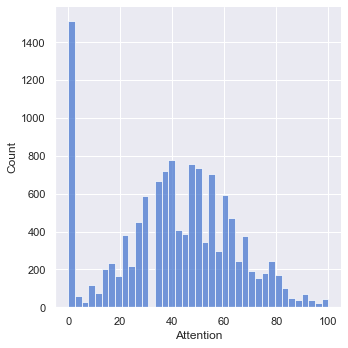

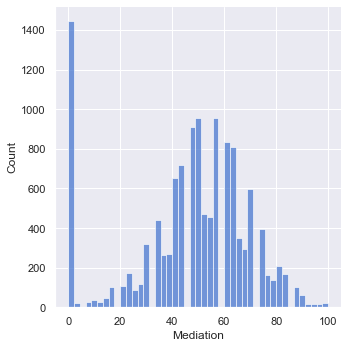

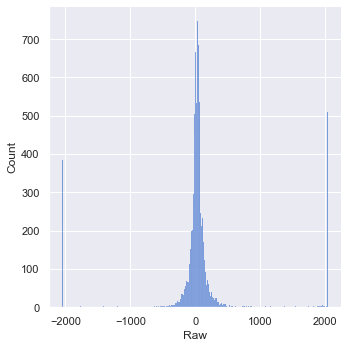

In [11]:
import seaborn as sns

sns.set(color_codes=True)
sns.set_palette(sns.color_palette("muted"))

sns.displot(EEGdataWithDemographics["Attention"].dropna());
sns.displot(EEGdataWithDemographics["Mediation"].dropna());
sns.displot(EEGdataWithDemographics["Raw"].dropna());

attention and mediation has zeros need to be analysed

Correlations are a great way to discover relationships between numerical variables. There are various ways to calculate the correlation. 

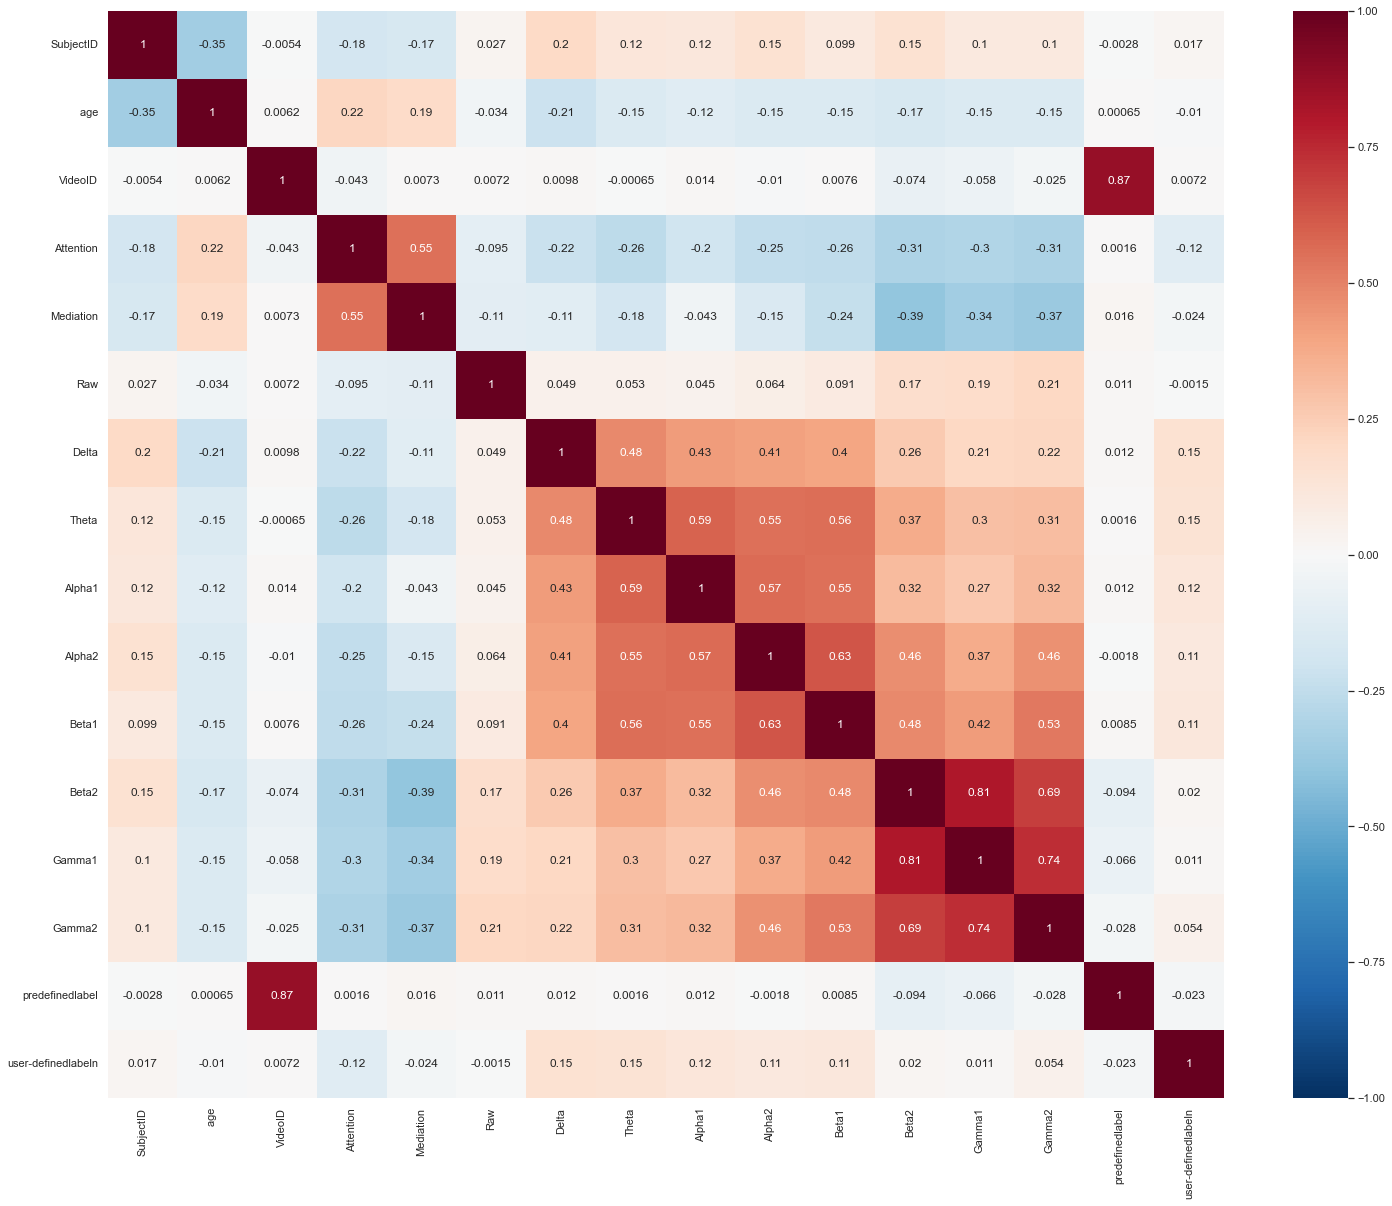

In [12]:
corr = EEGdataWithDemographics.corr()

plt.figure(figsize=(25, 20))
sns.heatmap(corr, annot=True, vmin=-1.0, cmap="RdBu_r")
plt.show()

Plotting few signals,
But this not individual subject signals its a plot of whole dataset

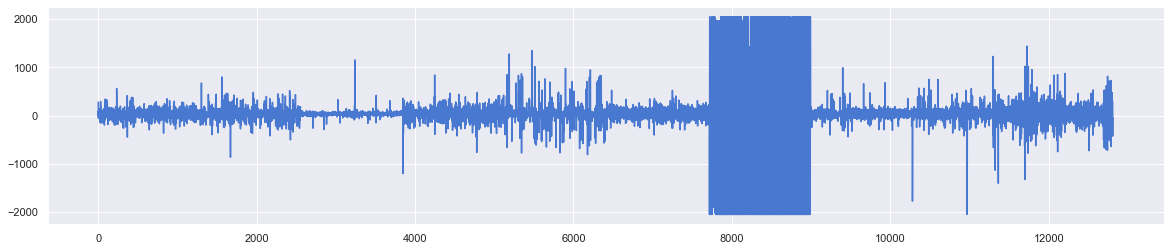

In [13]:
EEGdataWithDemographics['Raw'].plot(figsize=(20,4))
plt.show()

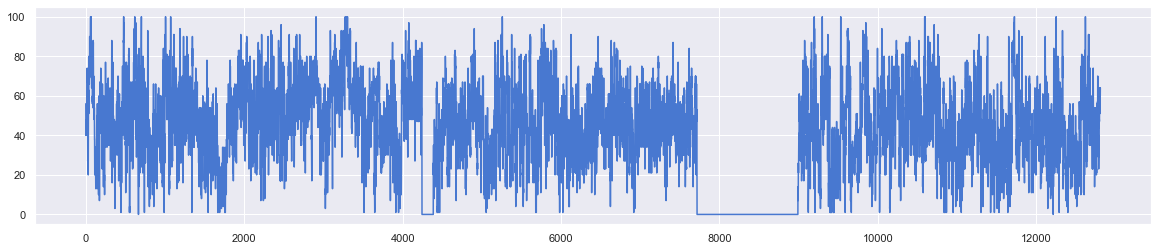

In [14]:
EEGdataWithDemographics['Attention'].plot(figsize=(20,4))
plt.show()

some problem between 8000 and 9000



In [17]:
problematic_data= EEGdataWithDemographics.loc[EEGdataWithDemographics['Attention']==0]

In [18]:
problematic_data['SubjectID'].unique()

array([0, 3, 6, 9], dtype=int64)

There is some problem seen in the while recording the data from subject[0, 3, 6, 9]

In [19]:
problematic_data['SubjectID'].value_counts()


6    1275
3     144
0       2
9       2
Name: SubjectID, dtype: int64

this shows the problem is with subject 6 and 3


In [21]:
#ANOTHER way to get those index
prbindx=EEGdataWithDemographics[EEGdataWithDemographics['Attention']==0].index
prbindx

Int64Index([  664,   665,  4244,  4245,  4246,  4247,  4248,  4249,  4250,
             4251,
            ...
             8984,  8985,  8986,  8987,  8988,  8989,  8990,  8991, 12214,
            12215],
           dtype='int64', length=1423)

In [22]:
#drop those indexes
EEGdataWithDemographics.drop(prbindx,inplace=True)

In [23]:
EEGdataWithDemographics.iloc[8000:9000,:]

,SubjectID,age,ethnicity,gender,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln
9421,7,25,Han Chinese,M,3.0,35.0,83.0,459.0,1716772.0,209162.0,60921.0,25537.0,33873.0,19423.0,7875.0,5541.0,0.0,1.0
9422,7,25,Han Chinese,M,3.0,35.0,80.0,-29.0,341694.0,19447.0,3895.0,5098.0,2490.0,2947.0,931.0,675.0,0.0,1.0
9423,7,25,Han Chinese,M,3.0,17.0,63.0,411.0,895861.0,375775.0,79695.0,74240.0,31066.0,16484.0,15357.0,12724.0,0.0,1.0
9424,7,25,Han Chinese,M,3.0,17.0,69.0,24.0,1674483.0,32205.0,23018.0,21260.0,7466.0,9770.0,7938.0,2560.0,0.0,1.0
9425,7,25,Han Chinese,M,3.0,24.0,81.0,102.0,247602.0,136636.0,98510.0,86604.0,28572.0,28866.0,21860.0,20064.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10416,8,25,Han Chinese,M,1.0,69.0,60.0,386.0,99079.0,66805.0,7802.0,11689.0,9399.0,11092.0,7344.0,4458.0,0.0,0.0
10417,8,25,Han Chinese,M,1.0,66.0,51.0,144.0,277117.0,52365.0,13005.0,10287.0,3850.0,5063.0,919.0,1933.0,0.0,0.0
10418,8,25,Han Chinese,M,1.0,56.0,51.0,134.0,210773.0,549935.0,94487.0,31806.0,32933.0,40596.0,30415.0,27481.0,0.0,0.0
10419,8,25,Han Chinese,M,1.0,44.0,63.0,19.0,995267.0,245355.0,154230.0,20384.0,24228.0,26310.0,24580.0,15206.0,0.0,0.0


<AxesSubplot:>

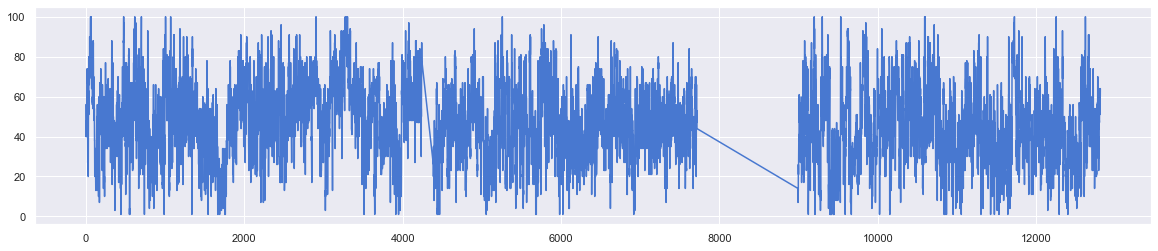

In [24]:
#now lets plot the attention
EEGdataWithDemographics['Attention'].plot(figsize=(20,4))

this shows we need to reset the index


In [25]:
EEGdataWithDemographics=EEGdataWithDemographics.reset_index()

<AxesSubplot:>

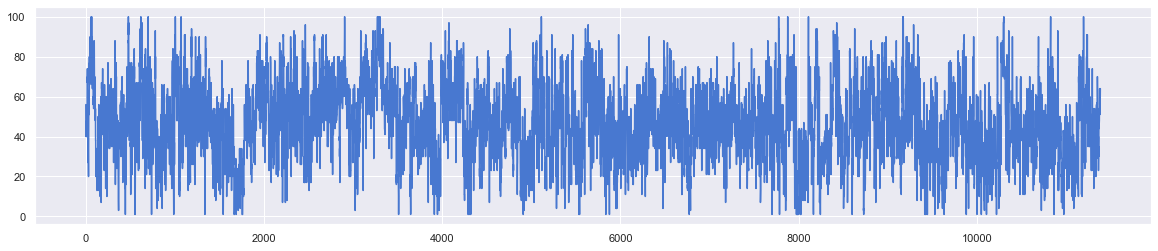

In [26]:
EEGdataWithDemographics['Attention'].plot(figsize=(20,4))

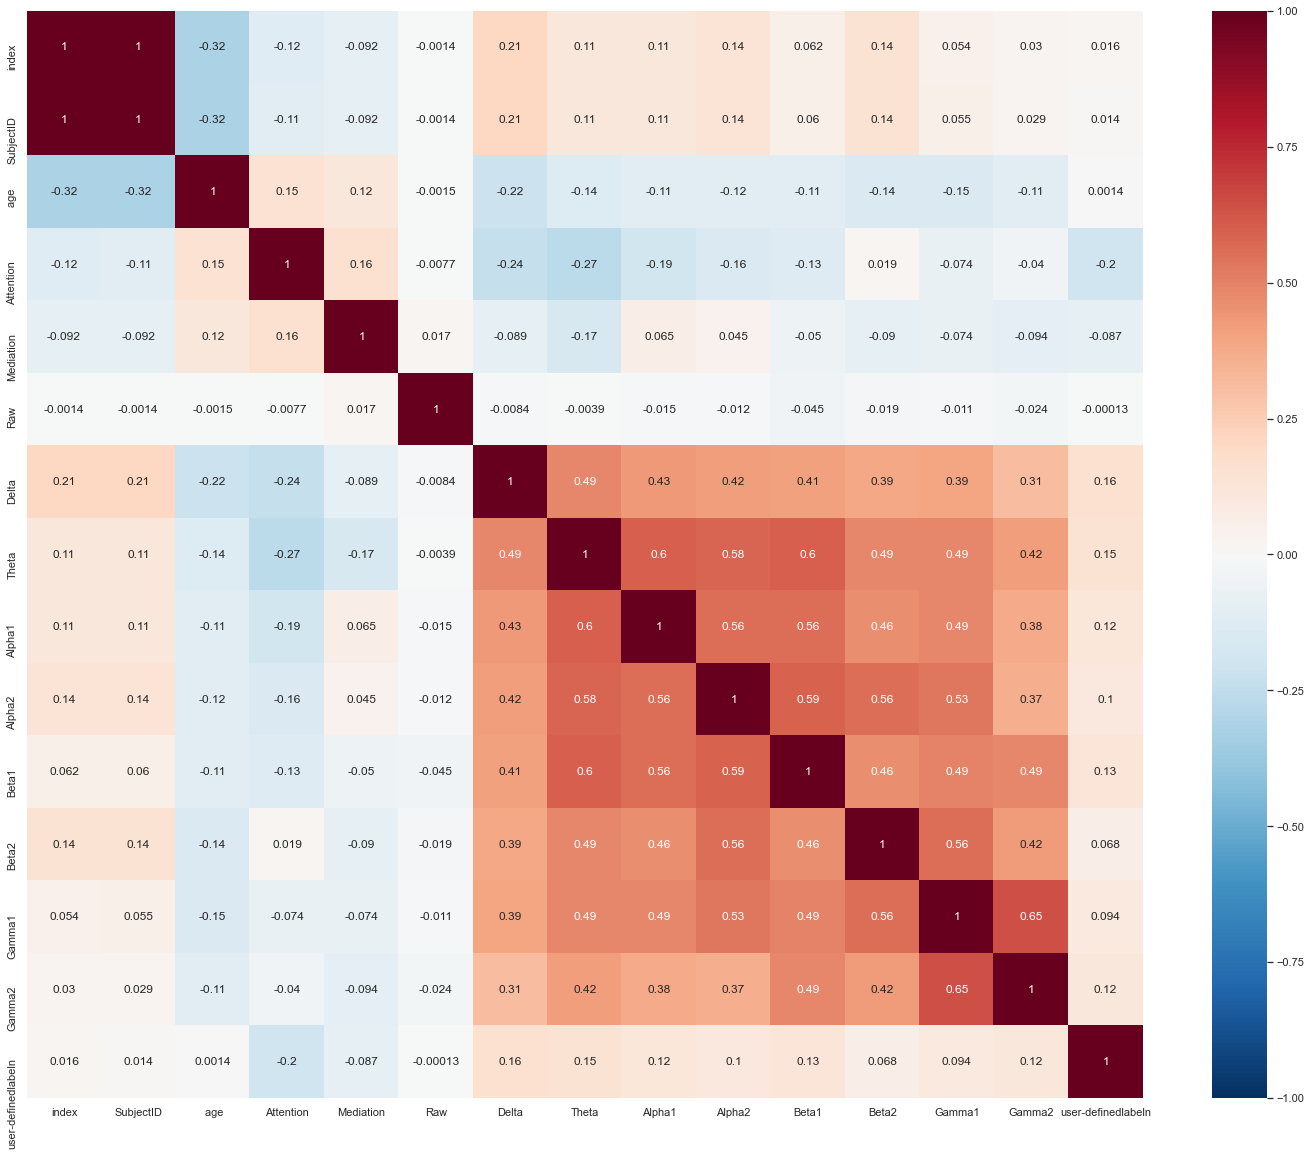

In [62]:
corr = EEGdataWithDemographics.corr()

plt.figure(figsize=(25, 20))
sns.heatmap(corr, annot=True, vmin=-1.0, cmap="RdBu_r")
plt.show()